# Cross validation

#### K-Fold cross validation
#### Stratified K-fold cross-validation
    > Skewed data set 90% to 10%
#### Hold-out based validation
#### leave - one -out cross-validation
#### group k- fold cross-validation


In [1]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

from sklearn import tree
from sklearn import metrics

In [16]:
path = os.path.abspath("./Data/wine_quality_red.csv")

In [17]:
data = pd.read_csv(path)
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [34]:
data.quality.value_counts()

2    681
3    638
4    199
1     53
5     18
0     10
Name: quality, dtype: int64

In [13]:
print(sorted(data.quality.unique()))

[3, 4, 5, 6, 7, 8]


In [18]:
quality_mapping = {3:0,4:1,5:2,6:3,7:4,8:5}

In [24]:
quality_mapping

{3: 0, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5}

In [19]:
data.loc[:,"quality"] = data.quality.map(quality_mapping)

In [20]:
data = data.sample(frac=1).reset_index(drop=True)

In [11]:
data_train = data.head(1000)
data_test = data.tail(599)

In [18]:
data_test.count()

fixed acidity           599
volatile acidity        599
citric acid             599
residual sugar          599
chlorides               599
free sulfur dioxide     599
total sulfur dioxide    599
density                 599
pH                      599
sulphates               599
alcohol                 599
quality                 599
dtype: int64

In [20]:
clf = tree.DecisionTreeClassifier(max_depth=7)

In [19]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [22]:
cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

In [23]:
clf.fit(data_train[cols], data_train.quality)

DecisionTreeClassifier(max_depth=7)

In [24]:
train_predictions = clf.predict(data_train[cols])
test_predictions = clf.predict(data_test[cols])

In [25]:
train_accuracy = metrics.accuracy_score(data_train.quality, train_predictions)
test_accuracy = metrics.accuracy_score(data_test.quality, test_predictions)


In [26]:
print("Train Accuracy: ", train_accuracy,"\n Test Accuracy: ", test_accuracy)

Train Accuracy:  0.783 
 Test Accuracy:  0.5726210350584308


## Visualization

In [1]:
from sklearn import tree
from sklearn import metrics

In [29]:
import matplotlib
import matplotlib.pyplot
import seaborn as sns

In [4]:
matplotlib.rc('xtick', labelsize = 20)
matplotlib.rc('ytick', labelsize = 20)

In [6]:
%matplotlib inline

In [8]:
train_accuracies = [0.5]
test_accuracies = [0.5]

In [27]:
for depth in range(1, 25):
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    
    cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
    
    clf.fit(data_train[cols], data_train.quality)
    
    train_predictions = clf.predict(data_train[cols])
    test_predictions = clf.predict(data_test[cols])
    
    # Accuracies
    train_accuracy = metrics.accuracy_score(data_test.quality, test_predictions)
    
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    

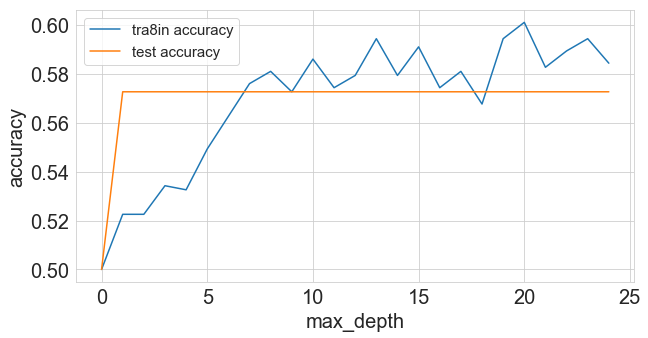

In [29]:
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")

plt.plot(train_accuracies, label = "train accuracy")
plt.plot(test_accuracies, label = "test accuracy")
plt.legend(loc = "upper left", prop={'size':15})
plt.xticks(range(0,26,5))
plt.xlabel("max_depth", size=20)
plt.ylabel("accuracy", size=20)
plt.show()

## K-Fold Cross Validation

In [7]:
import pandas as pd
from sklearn import model_selection

In [12]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,11.8,0.260,0.52,1.8,0.071,6.0,10.0,0.99680,3.20,0.72,10.2,4
1,6.6,0.735,0.02,7.9,0.122,68.0,124.0,0.99940,3.47,0.53,9.9,2
2,9.4,0.685,0.26,2.4,0.082,23.0,143.0,0.99780,3.28,0.55,9.4,2
3,7.3,0.440,0.20,1.6,0.049,24.0,64.0,0.99350,3.38,0.57,11.7,3
4,12.0,0.630,0.50,1.4,0.071,6.0,26.0,0.99791,3.07,0.60,10.4,1


In [15]:
data["K_Fold"] = -1

data = data.sample(frac=1).reset_index(drop=True)

kf = model_selection.KFold(n_splits=5)

for fold, (trn_, val_) in enumerate(kf.split(X = data)):
    data.loc[val_, 'K_Fold'] = fold
    
data.to_csv("train_folds.csv", index = False)    

# Startified K-Fold  Cross Validation

In [27]:
data.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,K_Fold
0,9.5,0.86,0.26,1.9,0.079,13.0,28.0,0.99712,3.25,0.62,10.0,2,0
1,7.7,0.67,0.23,2.1,0.088,17.0,96.0,0.99620,3.32,0.48,9.5,2,0
2,7.0,0.65,0.02,2.1,0.066,8.0,25.0,0.99720,3.47,0.67,9.5,3,0
3,6.4,0.42,0.09,2.3,0.054,34.0,64.0,0.99724,3.41,0.68,10.4,3,0
4,6.8,0.61,0.20,1.8,0.077,11.0,65.0,0.99710,3.54,0.58,9.3,2,0


In [25]:
y = data.quality.values
y

array([2, 2, 2, ..., 3, 2, 3], dtype=int64)

In [26]:
data["K_Fold"] = -1

data = data.sample(frac=1).reset_index(drop=True)
data.drop(['quality'], axis=1)
kf = model_selection.StratifiedKFold(n_splits=5)

for fold, (trn_, val_) in enumerate(kf.split(X = data, y=y)):
    data.loc[val_, 'K_Fold'] = fold
    
data.to_csv("train__startified_folds.csv", index = False)    

Text(0, 0.5, 'Count')

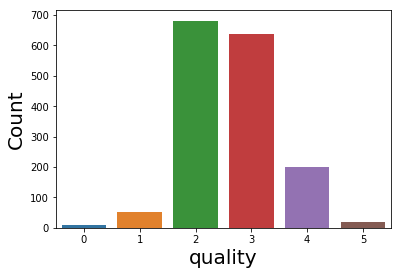

In [30]:
# Distribution of Wine data set

b = sns.countplot(x = "quality", data = data)
b.set_xlabel("quality", fontsize=20)
b.set_ylabel("Count", fontsize=20)

# End